# Library Used - [iGraph Python Library](https://igraph.org/)
# Dataset chosen -  [email-Eu-core network](https://snap.stanford.edu/data/email-Eu-core.html)


# Assignment Submitted By - Mitesh Pandey(2023EET2473)

# [Github Link for the repo](https://github.com/davidmitesh/Graph-Visualization.git)

In [ ]:
!pip install igraph
!git clone https://github.com/davidmitesh/Graph-Visualization.git


import igraph as ig
import matplotlib.pyplot as plt
import random


newGraph = ig.Graph.Read("Graph-Visualization/email-Eu-core 2.txt","edges",directed=True)

fatal: destination path 'Graph-Visualization' already exists and is not an empty directory.


# Let us first find out the number of vertices and edges in the graph.

In [ ]:
vertices = newGraph.vcount()
print("Number of vertices in the graph is : "+str(vertices))
edges = newGraph.ecount()
print("Number of edges in the graph is : "+str(edges))

Number of vertices in the graph is : 1005
Number of edges in the graph is : 25571


# Question 1.  Visualize the Graph using 2 layouts.

**Layout 1 : fruchterman_reingold**

<Axes: >

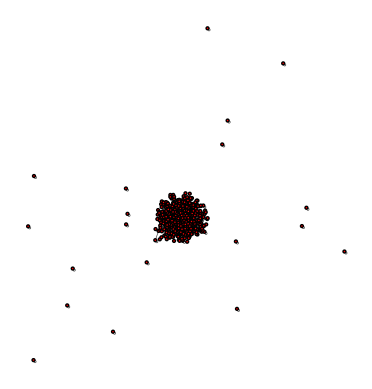

In [ ]:

fig, ax = plt.subplots()
visual_style = {
    "edge_width": 0.5,
    "vertex_size": 0.3,
    "palette": "heat",
    "layout": "fruchterman_reingold"
}
ig.plot(newGraph,target = ax,**visual_style)

**Layout 2 : kamada_kawai**

<Axes: >

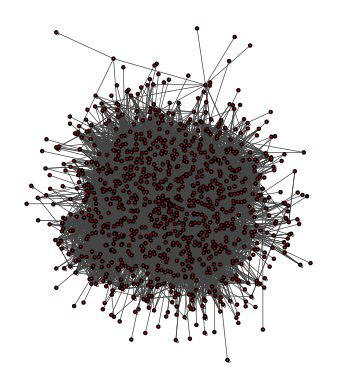

In [ ]:
fig, ax = plt.subplots()
visual_style = {
    "edge_width": 0.5,
    "vertex_size": 0.3,
    "palette": "heat",
    "layout": "kamada_kawai"
}
ig.plot(newGraph,target = ax,**visual_style)

# Question 2. Calculate Degree Distribution and assign sizes to the vertices based on their degree.

(array([333., 131., 115.,  98.,  72.,  57.,  44.,  29.,  26.,  20.,  16.,
          8.,  12.,   1.,  10.,   7.,   5.,   7.,   2.,   2.,   2.,   0.,
          2.,   0.,   0.,   1.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.   ,  14.625,  28.25 ,  41.875,  55.5  ,  69.125,  82.75 ,
         96.375, 110.   , 123.625, 137.25 , 150.875, 164.5  , 178.125,
        191.75 , 205.375, 219.   , 232.625, 246.25 , 259.875, 273.5  ,
        287.125, 300.75 , 314.375, 328.   , 341.625, 355.25 , 368.875,
        382.5  , 396.125, 409.75 , 423.375, 437.   , 450.625, 464.25 ,
        477.875, 491.5  , 505.125, 518.75 , 532.375, 546.   ]),
 <BarContainer object of 40 artists>)

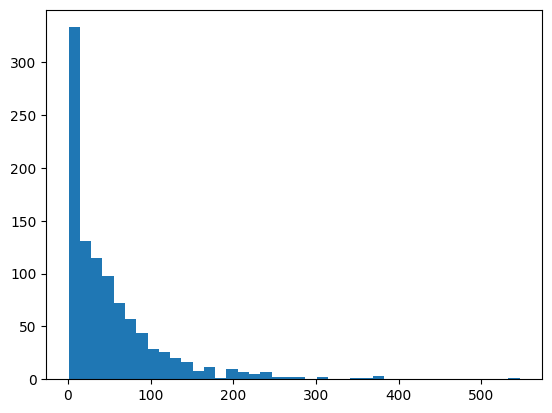

In [ ]:
plt.hist(newGraph.degree(),40)

# Now, Assigning sizes to vertices based on their degree.

<Axes: >

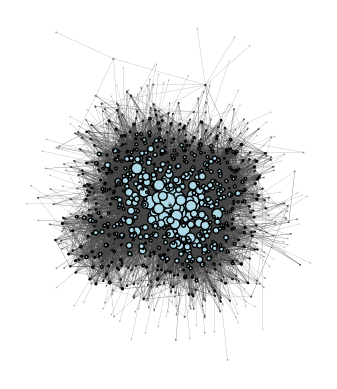

In [ ]:
vertex_size = [x/200 for x in newGraph.degree()]
fig, ax = plt.subplots()
ig.plot(
    newGraph,
    target=ax,
    layout = "kamada_kawai",
    edge_width= 0.1,
    vertex_color="lightblue",
    vertex_size=vertex_size,

)

# Question 4 : Filter the nodes by degree such that :

# - Bottom 10% of the nodes and the connection among them are visible.

<Axes: >

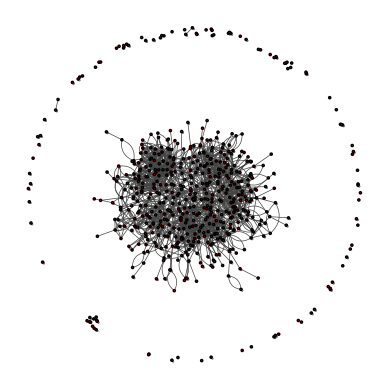

In [ ]:
g_new = newGraph.vs(_degree_gt = 1)
g_new = newGraph.subgraph(g_new)
gt_new = g_new.vs(_degree_lt = 55)
gt_new = g_new.subgraph(gt_new)
fig, ax = plt.subplots()
visual_style = {
    "edge_width": 0.5,
    "vertex_size": 0.3,
    "palette": "heat",
    "layout": "kamada_kawai"
}
ig.plot(gt_new,target = ax,**visual_style)

# - Top 5% of the nodes and the connection among them are visible.



<Axes: >

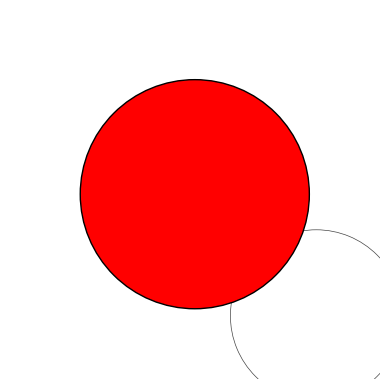

In [ ]:
g_new = newGraph.vs(_degree_gt = 500)
g_new = newGraph.subgraph(g_new)
fig, ax = plt.subplots()
visual_style = {
    "edge_width": 0.5,
    "vertex_size": 0.3,
    "palette": "heat",
    "layout": "kamada_kawai"
}
ig.plot(g_new,target = ax,**visual_style)

Taking nodes with degree from n = 350 to n = 546 would result in the following graph which has some nodes and connection visible.

<Axes: >

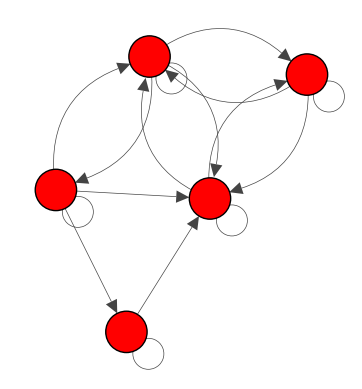

In [ ]:
g_new = newGraph.vs(_degree_gt = 350)
g_new = newGraph.subgraph(g_new)
fig, ax = plt.subplots()
visual_style = {
    "edge_width": 0.5,
    "vertex_size": 0.3,
    "palette": "heat",
    "layout": "kamada_kawai"
}
ig.plot(g_new,target = ax,**visual_style)

# Question No 5. Find all the connected components of the graph.

In [ ]:
weak_components = newGraph.connected_components(mode='weak')
strong_components = newGraph.connected_components(mode='strong')
print("Length of weak components is " + str(len(weak_components.subgraphs())))
print("Length of strong components is " + str(len(strong_components.subgraphs())))

Length of weak components is 20
Length of strong components is 203


As we can see from the result above, there are 20 weakly connected components and 203 strongly connected components in the graph.

Now, let us see the connected components visually in the graph:


1. For Weakly-connected components:

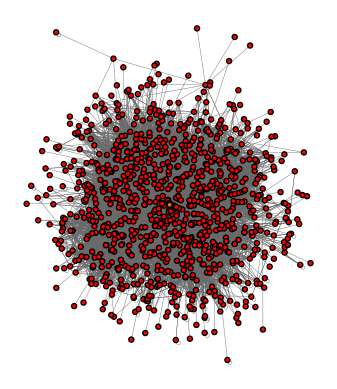

In [ ]:
fig, ax = plt.subplots()
ig.plot(
    weak_components,
    target=ax,
    palette=ig.RainbowPalette(),
    vertex_size=0.5,
    # vertex_color=list(map(int, ig.rescale(components.membership, (0, 200)))),
    edge_width=0.3,
    layout = "kamada_kawai"
)
plt.show()

2. For Strongly-connected components:

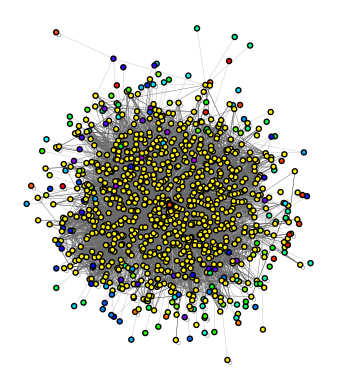

In [ ]:
fig, ax = plt.subplots()
ig.plot(
    strong_components,
    target=ax,
    palette=ig.RainbowPalette(),
    vertex_size=0.5,
    # vertex_color=list(map(int, ig.rescale(components.membership, (0, 200)))),
    edge_width=0.3,
    layout = "kamada_kawai"
)
plt.show()

# Question No. 6 : Find the Giant Component of the network.

<ipython-input-33-51b80f5a2783>:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  giantComponent = newGraph.clusters().giant()


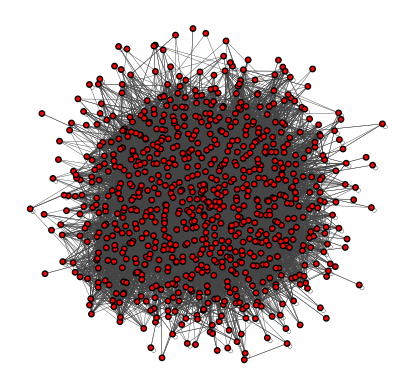

In [ ]:
giantComponent = newGraph.clusters().giant()
fig, ax = plt.subplots()
ig.plot(
    giantComponent,
    target=ax,
    palette=ig.RainbowPalette(),
    vertex_size=0.5,
    # vertex_color=list(map(int, ig.rescale(components.membership, (0, 200)))),
    edge_width=0.3,
    layout = "kamada_kawai"
)
plt.show()